In [1]:
import pandas as p
import matplotlib.pyplot as plt

In [4]:
df = p.read_csv("data/electricityConsumptionAndProductioction.csv")
df.head(10)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
5,2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
6,2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
7,2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34
8,2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34
9,2019-01-01 09:00:00,5617,5545,1388,15,1398,1328,1319,61,34


<Figure size 720x864 with 0 Axes>

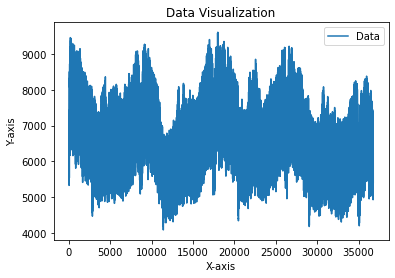

In [23]:
plt.figure(figsize=(10, 12))

df.plot(y='Consumption', label='Data')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [24]:
total_consumption = df['Consumption'].sum()
total_production = df['Production'].sum()
total_production_1 = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum().sum()

print(f"Total Consumption: {total_consumption} kWh")
print(f"Total Production (Production column): {total_production} kWh")
print(f"Total Production (sum of energy columns): {total_production_1} kWh")

Total Consumption: 246663814 kWh
Total Production (Production column): 240627528 kWh
Total Production (sum of energy columns): 240588004 kWh


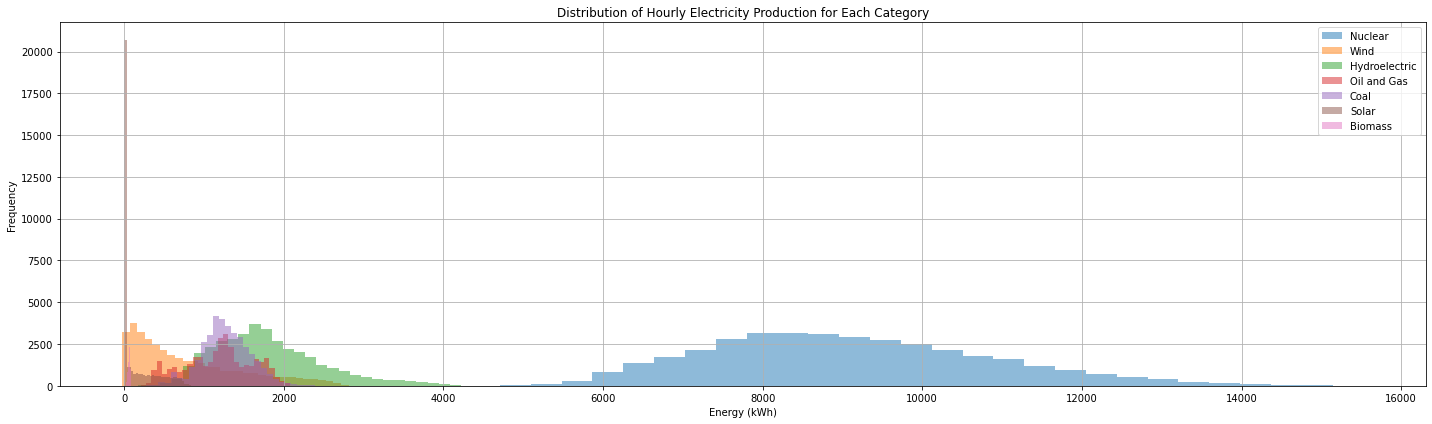

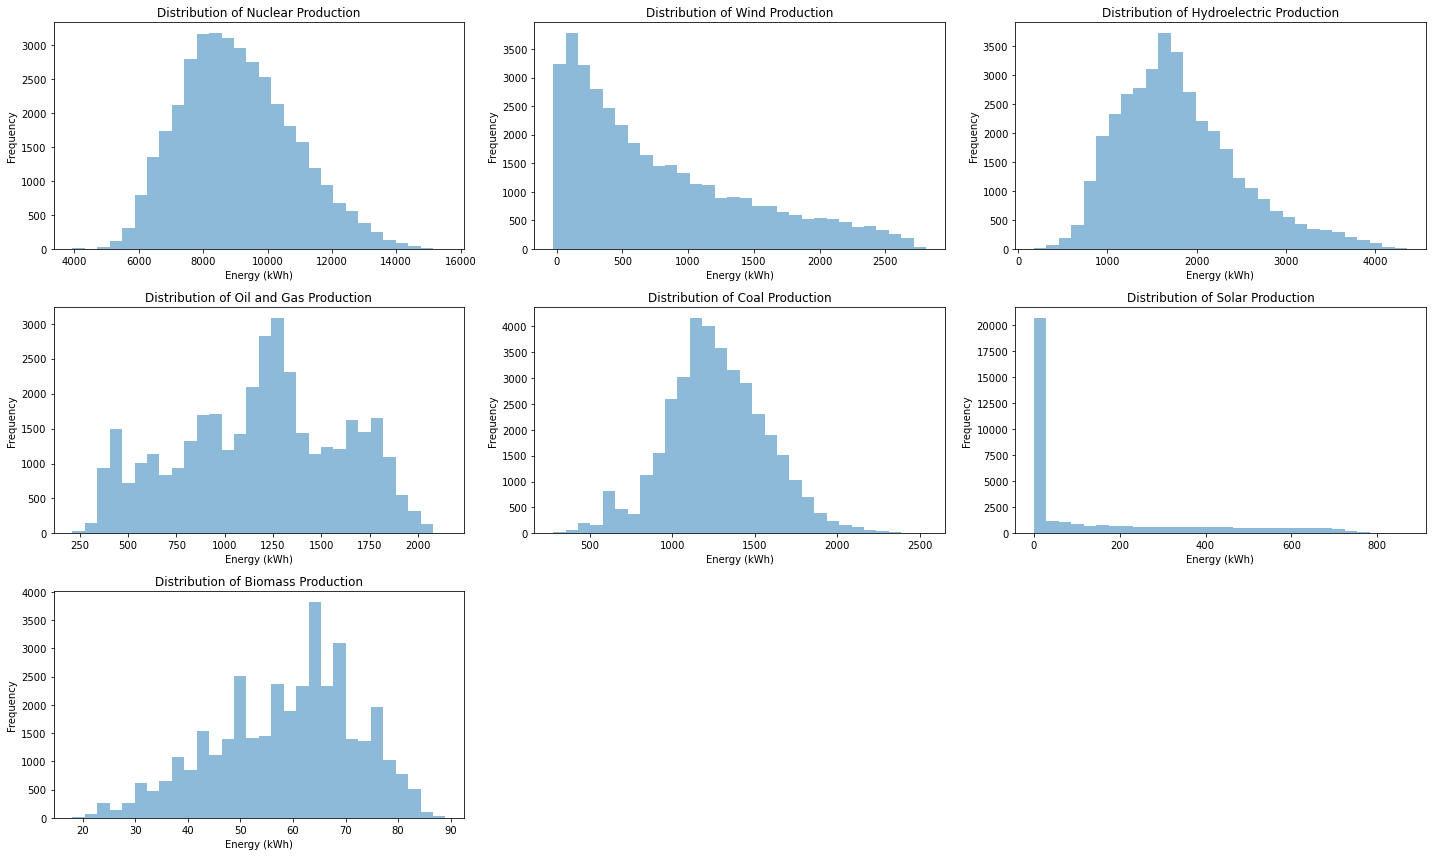

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

for category in production_categories:
    plt.hist(df[category].dropna(), bins=30, alpha=0.5, label=category)

plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Hourly Electricity Production for Each Category')
plt.grid(True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20, 12))

for i, category in enumerate(production_categories):
    # Create a subplot for the current category
    ax = fig.add_subplot(3, 3, i + 1)  # Assuming 3x3 grid for up to 9 categories
    
    # Plot the histogram for the current category
    ax.hist(df[category].dropna(), bins=30, alpha=0.5)
    
    # Set labels and title
    ax.set_xlabel('Energy (kWh)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category} Production')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()






ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

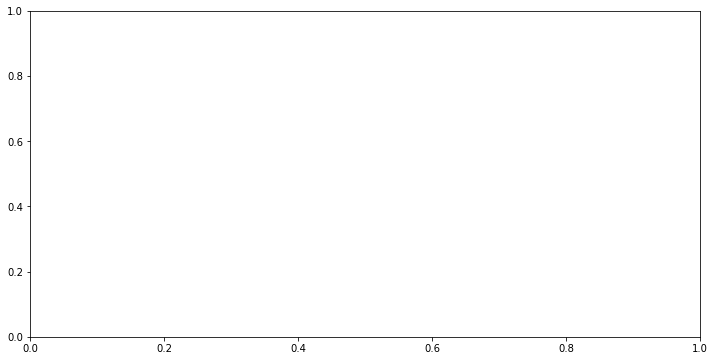

In [43]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'.

plt.figure(figsize=(12, 6))

# List of production categories
production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Set the time as the x-axis
x = df.index

# Initialize a variable to keep track of the bottom values for stacking
bottom = None

# Loop through each production category and create a stacked bar
for category in production_categories:
    plt.bar(x, df[category], label=category, alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = df[category]
    else:
        bottom += df[category]

plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.title('Hourly Electricity Production by Category Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


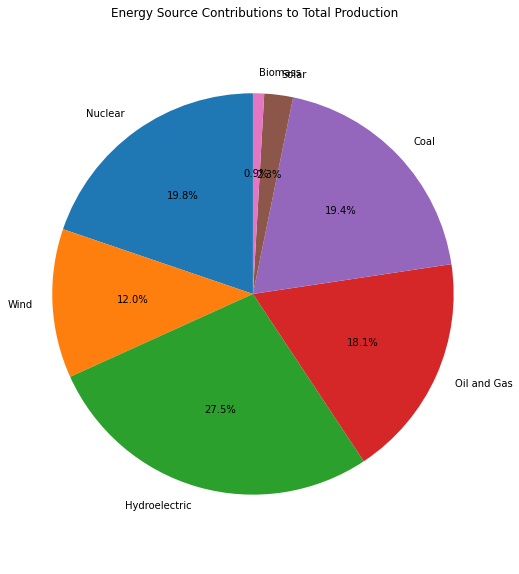

In [11]:
production_by_source = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum()
source_labels = production_by_source.index

plt.figure(figsize=(8, 10))
plt.pie(production_by_source, labels=source_labels, autopct='%1.1f%%', startangle=90)
plt.title('Energy Source Contributions to Total Production')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [14]:
max_consumption_hour = df['Consumption'].idxmax()
max_production_hour = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum(axis=1).idxmax()

print(f"Hour of Peak Consumption: {max_consumption_hour}")
print(f"Hour of Peak Production: {max_production_hour}")

Hour of Peak Consumption: 17988
Hour of Peak Production: 35709


In [15]:
df['DayOfWeek'] = df.index.day_name()
average_daily_consumption = df.groupby('DayOfWeek')['Consumption'].mean()
average_daily_production = df.groupby('DayOfWeek')[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_daily_consumption.index, average_daily_consumption, label='Average Consumption', marker='o')
plt.plot(average_daily_production.index, average_daily_production['Nuclear'], label='Average Nuclear Production', marker='o')
# Repeat for other production categories
plt.xlabel('Day of the Week')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.title('Seasonal and Weekly Patterns')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'day_name'

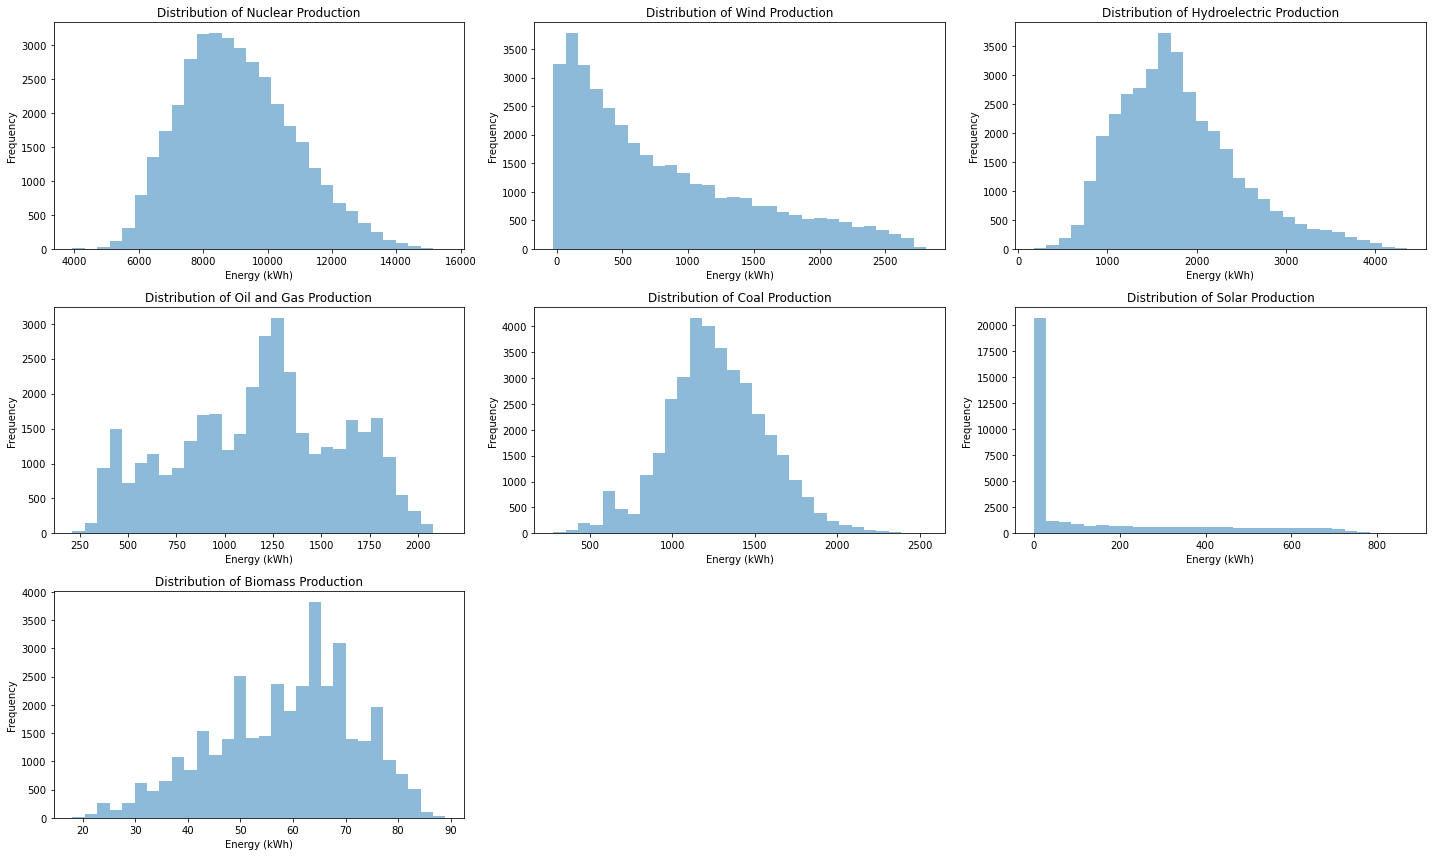

In [49]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'.

production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create a new figure
fig = plt.figure(figsize=(20, 12))

# Loop through each production category and create individual histograms
for i, category in enumerate(production_categories):
    # Create a subplot for the current category
    ax = fig.add_subplot(3, 3, i + 1)  # Assuming 3x3 grid for up to 9 categories
    
    # Plot the histogram for the current category
    ax.hist(df[category].dropna(), bins=30, alpha=0.5)
    
    # Set labels and title
    ax.set_xlabel('Energy (kWh)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category} Production')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
